# Evolution of agents - Foundry Tools
<img src="./images/student_tools.png" alt="Student LLM with Tools" style="max-height: 300px;" />


In [1]:
# Example: Inference using Semantic Kernel
import os
from setup import get_project_client, create_agent, test_agent
from azure.ai.agents.models import CodeInterpreterTool, FilePurpose

client = await get_project_client()

code_interpreter = CodeInterpreterTool()

DEFAULT_CSV_PATH = os.environ.get("BOOKS_CSV_PATH", "docs/book1-100k.csv")
file = await client.agents.files.upload_and_poll(
    file_path=DEFAULT_CSV_PATH,
    purpose=FilePurpose.AGENTS,
)
code_interpreter.add_file(file.id)

agent = await create_agent(
    agent_name="BookWormCodeInterpreter",
    agent_instructions="You are a helpful assistant for book-related queries. Use code interpreter and uploaded file for analysis",
    client=client,
    tools=[code_interpreter],
)
thread = None


 --- Agents ---
Agent ID: asst_tZpTWmH33TZRpbBtmk4IN4OC, Name: BookWormCodeInterpreter, Description: None, Deployment Name: gpt-4.1
Agent ID: asst_o1dNOdP9XbuX8I4jXmr6x8KU, Name: BookWorm, Description: None, Deployment Name: gpt-4.1
Agent ID: asst_KSyMjuZYZaLxJ3pFHPiC5Vu8, Name: MCP-Agent, Description: None, Deployment Name: gpt-4.1
Agent ID: asst_nM9apm6hwMO2f2zkikZrPIQ8, Name: Codex-Agent, Description: None, Deployment Name: gpt-4.1
Agent ID: asst_kmkgTGFihGXkvvQ3T7XGEqke, Name: Agent584, Description: None, Deployment Name: gpt-4.1
Agent ID: asst_ZBdk4NTvZWJZabECOlM49OrA, Name: LogicAppStandardAgent, Description: None, Deployment Name: gpt-4.1
Agent ID: asst_DBUVN6Y1Fq5vNX30vPzXT02e, Name: Jonny_Weather_mcp, Description: None, Deployment Name: gpt-4.1
Agent ID: asst_wXFErQvMiaIzdWN1nM9itvfv, Name: Jonny_Weather_openapi, Description: None, Deployment Name: gpt-4.1
Agent ID: asst_NoUJpYHsUFbesSMWXi27wYiF, Name: Jonny_Weather, Description: None, Deployment Name: gpt-35-turbo
Agent ID: 

In [ ]:
user_input = "What are the most 10 popular books by reviews?"
thread = await test_agent(client, agent, user_input, thread)

Agent: import pandas as pd

# Load and inspect the uploaded file
file_path = '/mnt/data/assistant-95GMijpEFJSwcNcC1Vt6th'
df = pd.read_csv(file_path)

# Display the first few rows and columns to understand the structure
df.head(), df.columns
Agent: # Get the top 10 books by number of reviews
top_10_books = df.nlargest(10, 'CountsOfReview')[['Name', 'Authors', 'CountsOfReview', 'Rating']]

top_10_books.reset_index(drop=True)
Agent: I'll analyze the uploaded file to identify the 10 most popular books based on the number of reviews. First, I'll inspect the file to understand its structure and content.
Agent: The file contains a column named `CountsOfReview`, which represents the number of reviews for each book. I will now identify the top 10 books with the highest number of reviews.
Agent: Here are the 10 most popular books by number of reviews:

| Rank | Book Name                                                      | Author(s)           | Reviews | Average Rating |
|------|-------------

In [ ]:
thread = await test_agent(
    client,
    agent,
    "what are the books about that child wizard? and what are their ratings?",
    thread=thread
)

Agent: # Let's inspect the uploaded file to determine its format and contents.
file_path = "/mnt/data/assistant-95GMijpEFJSwcNcC1Vt6th"

# Try to read the first few lines to identify the structure and content
with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
    sample = [next(f) for _ in range(10)]

sample
Agent: It sounds like you’re referring to the **Harry Potter** series, which is the most famous book series about a child wizard. Let me confirm this by analyzing the uploaded file to see if it contains information about Harry Potter or other child wizard books, and then I’ll provide details and ratings.

I'll start by examining the contents of your uploaded file.
Agent: Your file contains information about books, including several from the **Harry Potter** series by J.K. Rowling. Here’s a summary of the main Harry Potter books listed, along with their ratings:

### Harry Potter Books in Your File

| Title                                                             

In [4]:
thread = await test_agent(
    client,
    agent,
    "Yes, tell me about the most famous books about that child wizard. I'm interested in all the stats.",
    thread,
)

Agent: import pandas as pd

# Load the file into a DataFrame
df = pd.read_csv(file_path)

# Filter for main Harry Potter books (those with "Harry Potter" and a number in the title)
main_hp_books = df[df['Name'].str.contains(r'Harry Potter.*\(#\d+\)', regex=True)]

# Select relevant columns for detailed stats
columns_of_interest = [
    'Name', 'Authors', 'PublishYear', 'Publisher', 'pagesNumber', 'Rating',
    'CountsOfReview', 'RatingDistTotal', 'RatingDist1', 'RatingDist2',
    'RatingDist3', 'RatingDist4', 'RatingDist5', 'ISBN', 'Language'
]
main_hp_books_stats = main_hp_books[columns_of_interest]

main_hp_books_stats.reset_index(drop=True, inplace=True)
main_hp_books_stats
Agent: # Adjust filter to capture all main Harry Potter books
main_hp_books = df[df['Name'].str.startswith("Harry Potter and")]

# Select relevant columns for detailed stats
main_hp_books_stats = main_hp_books[columns_of_interest]

main_hp_books_stats.reset_index(drop=True, inplace=True)
main_hp_books_stats
Agent

------- CODE START ----------
import pandas as pd

# Load the uploaded file to inspect its contents
file_path = '/mnt/data/assistant-EDm3oKsWqUESWUayT4rT2B'
df = pd.read_csv(file_path)

# Display the first few rows and columns to understand the structure
df.head(), df.columns
------- CODE END ------------
------- CODE START ----------
# Map book titles to emojis
emoji_map = {
    "Sorcerer's Stone": "🧙‍♂️",
    "Chamber of Secrets": "🗝️",
    "Prisoner of Azkaban": "🐺",
    "Goblet of Fire": "🔥",
    "Order of the Phoenix": "🦉",
    "Half-Blood Prince": "🧪",
    "Deathly Hallows": "⚡"
}

# Extract relevant rows for Harry Potter books
hp_books = df[df['Name'].str.contains("Harry Potter")]

# Create a mapping from book title to emoji and clean up the titles
def get_short_title(name):
    for key in emoji_map:
        if key in name:
            return f"{emoji_map[key]} {key}"
    return name

hp_books['ShortTitle'] = hp_books['Name'].apply(get_short_title)

# Prepare data for plotting
p

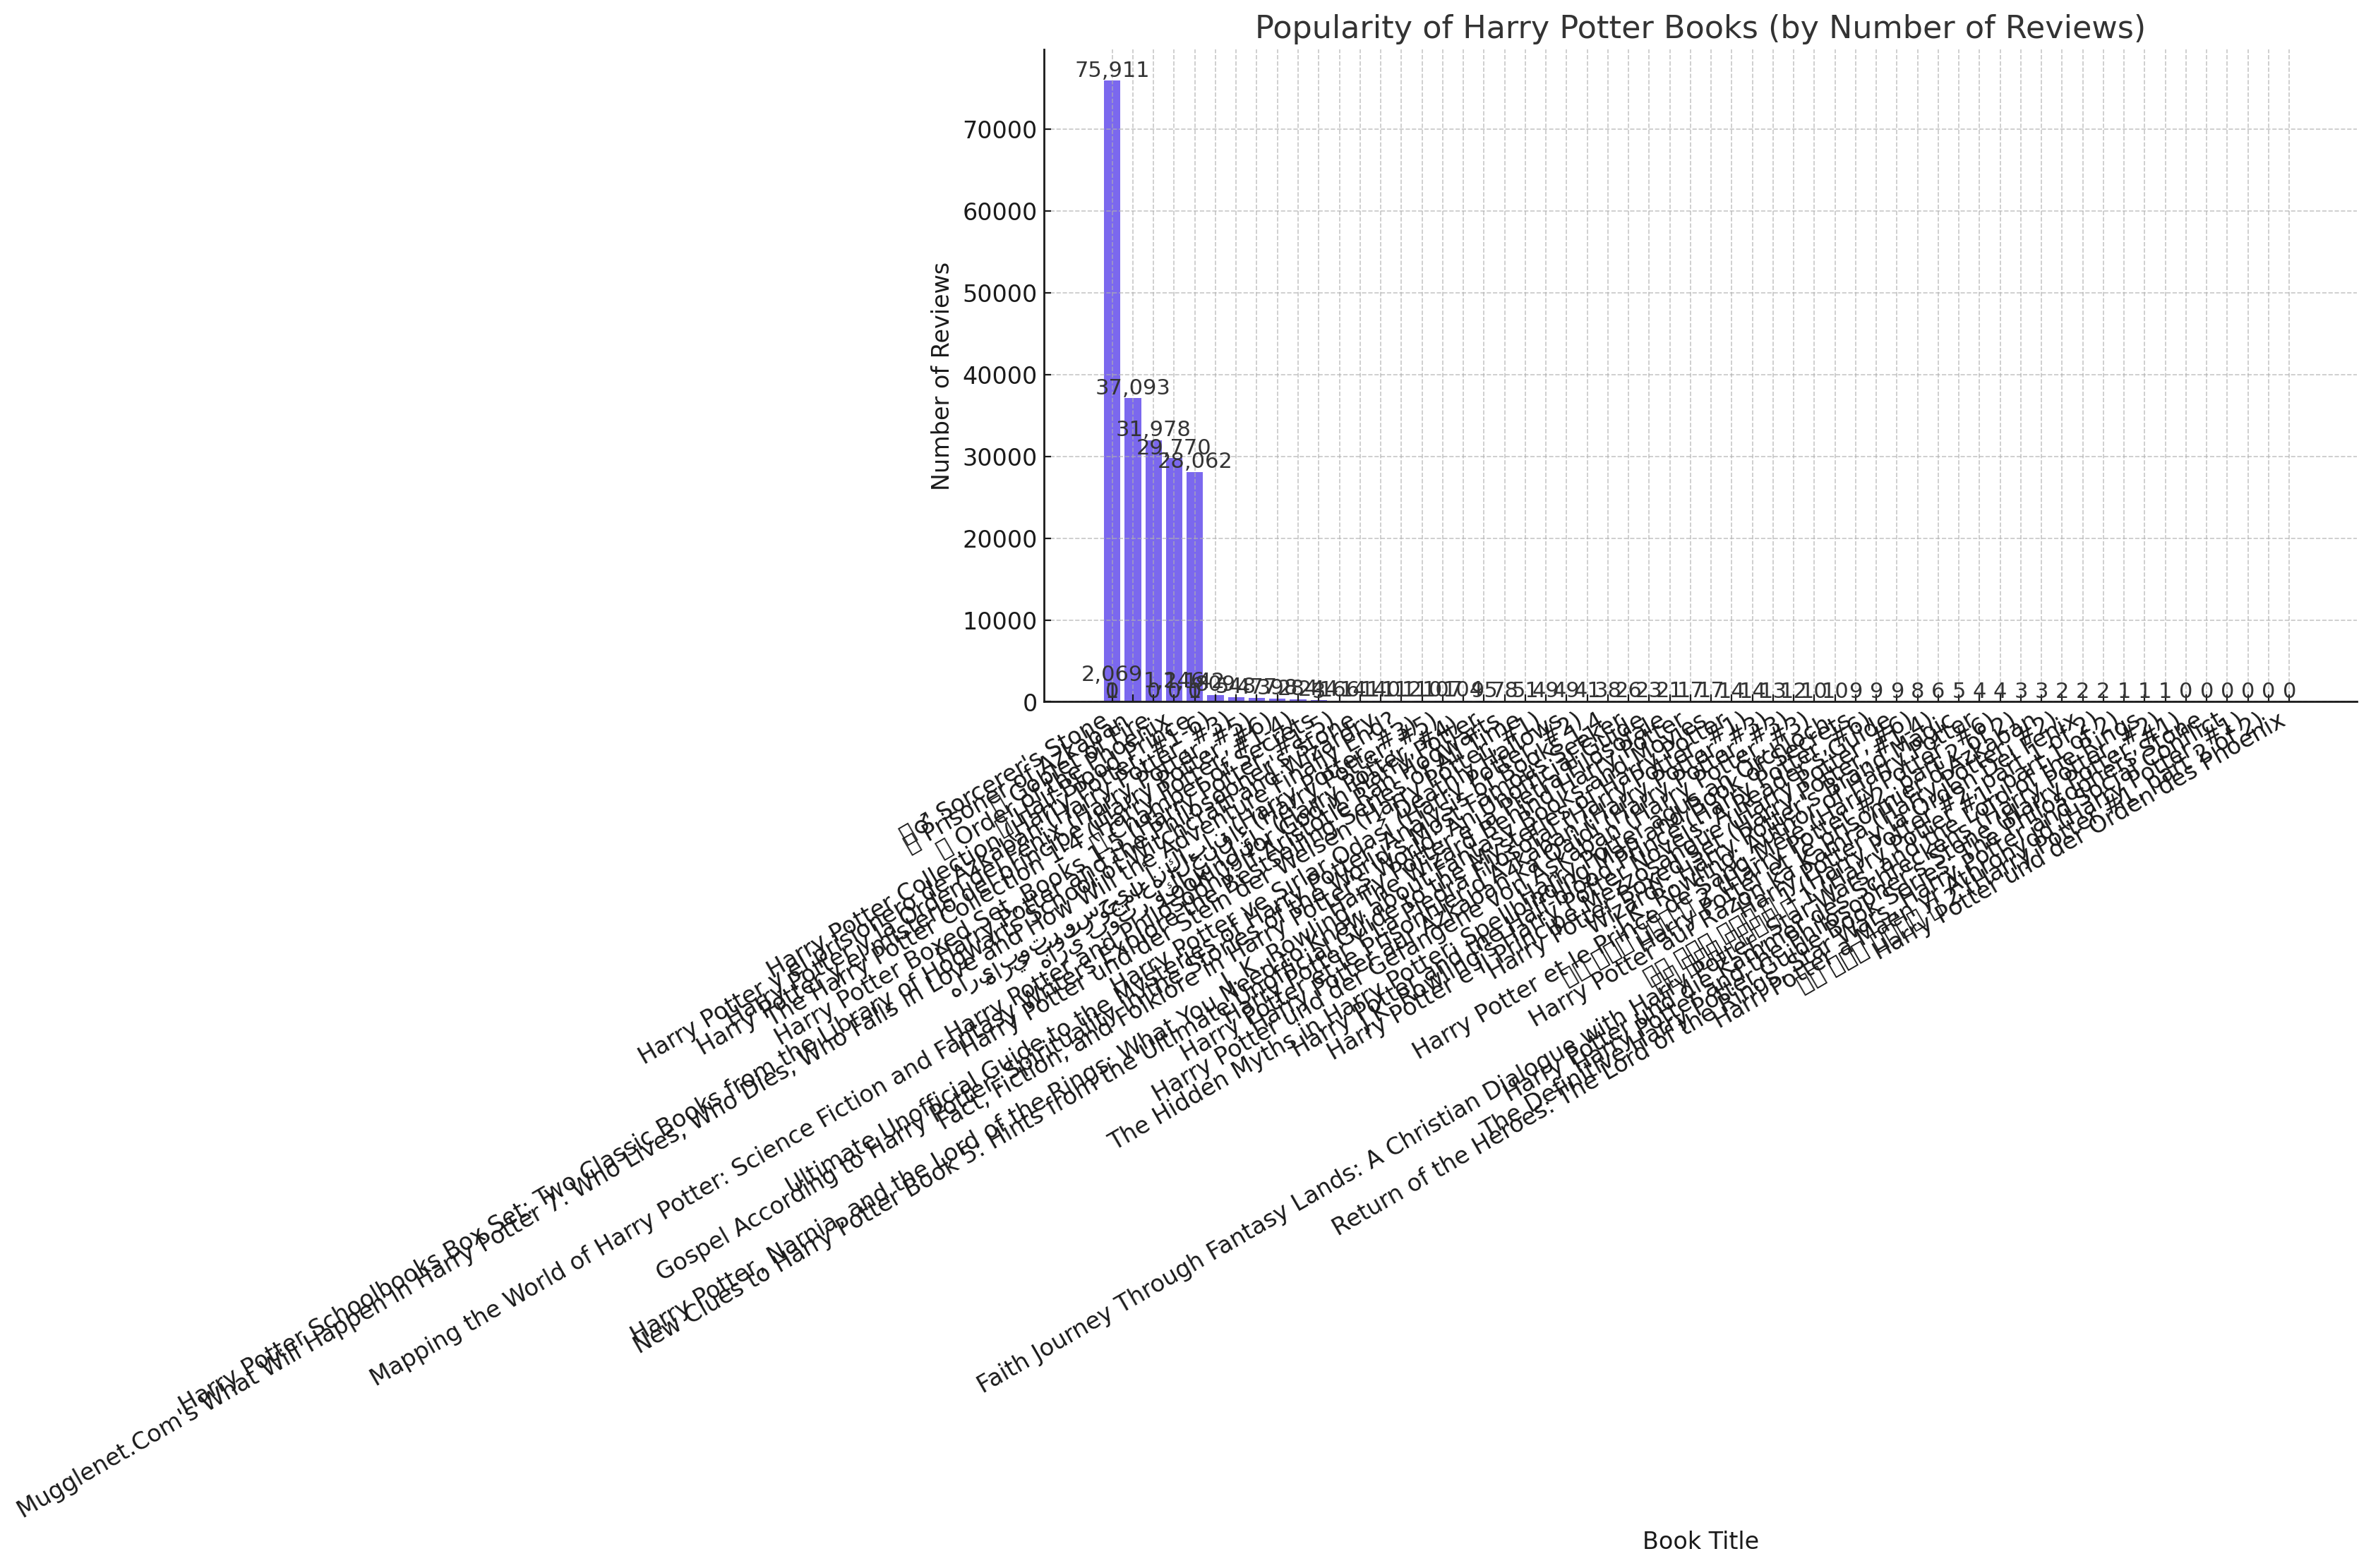

Agent: Here is a bar chart showing the popularity of the Harry Potter books (based on number of reviews), with creative emojis for each title. The emojis represent key themes or symbols from each book:

- 🧙‍♂️ Sorcerer's Stone
- 🗝️ Chamber of Secrets
- 🐺 Prisoner of Azkaban
- 🔥 Goblet of Fire
- 🦉 Order of the Phoenix
- 🧪 Half-Blood Prince
- ⚡ Deathly Hallows

The chart visually demonstrates which books in the series are the most popular among readers. If you'd like a cleaner chart focusing only on the main seven books, let me know!


In [ ]:
thread = await test_agent(
    client,
    agent,
    "Can you provide a bar chart for all the books in main the Harry Potter series and their popularity? Use emojis with each book title. Get creative.",
    thread=thread,
)